In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

##Load dataset

In [43]:
df = pd.read_excel("advertising_sales_data.xlsx")
df = df.dropna()
print(" Dataset Preview:")
print(df.head())
print("\nColumn Data Types:")
print(df.dtypes)

numeric_df = df.select_dtypes(include=['float64', 'int64'])


 Dataset Preview:
  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9

Column Data Types:
Campaign      object
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


## Average amount spend on TV advertising

In [44]:
if 'TV' in numeric_df.columns:
    avg_tv = numeric_df['TV'].mean()
    print(f"\n Average amount spent on TV advertising: ${avg_tv:.2f}")
else:
    print("\n 'TV' column not found or not numeric.")



 Average amount spent on TV advertising: $146.79


#Correlation between Radio and Sales


In [45]:
if 'Radio' in numeric_df.columns and 'Sales' in numeric_df.columns:
    correlation_radio_sales = numeric_df['Radio'].corr(numeric_df['Sales'])
    print(f"\n🔗 Correlation between Radio advertising and Sales: {correlation_radio_sales:.2f}")


🔗 Correlation between Radio advertising and Sales: 0.35


## Advertising medium with highest correlation

In [46]:
if 'Sales' in numeric_df.columns:
    correlations = numeric_df.corr()['Sales'].drop('Sales')
    highest_corr = correlations.idxmax()
    print(f"\n Advertising medium with highest correlation with Sales: {highest_corr} ({correlations[highest_corr]:.2f})")


 Advertising medium with highest correlation with Sales: TV (0.90)


##Heatmap of correlation

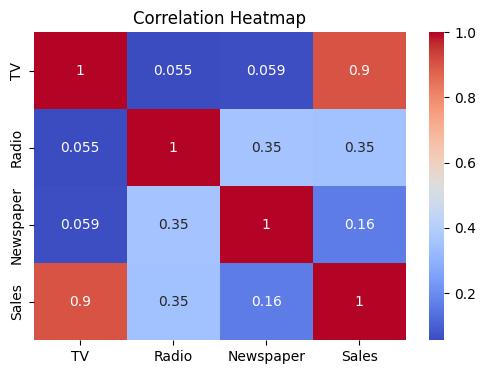

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Linear Regression with all variables

In [48]:
features = ['TV', 'Radio', 'Newspaper']
if all(col in numeric_df.columns for col in features):
  X = numeric_df[features]
  y = numeric_df['Sales']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plotting actual vs predicted sales


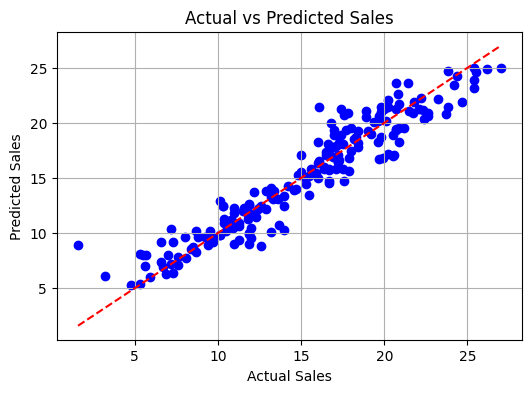


 Model Coefficients: [ 5.44940753e-02  1.07180244e-01 -1.90190181e-05]
 Intercept: 4.63430429015234


In [52]:
    plt.figure(figsize=(6, 4))
    plt.scatter(y, predictions, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual vs Predicted Sales")
    plt.grid(True)
    plt.show()

    print(f"\n Model Coefficients: {model.coef_}")
    print(f" Intercept: {model.intercept_}")

# Predicting for new input

In [56]:
new_data = pd.DataFrame([[200, 40, 50]], columns=['TV', 'Radio', 'Newspaper'])
predicted_sales = model.predict(new_data)
print(f"\n Predicted Sales for $200 TV, $40 Radio, $50 Newspaper: {predicted_sales[0]:.2f}")


🔮 Predicted Sales for $200 TV, $40 Radio, $50 Newspaper: 19.82


# Performance after normalization

In [58]:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model_scaled = LinearRegression()
    model_scaled.fit(X_scaled, y)
    scaled_preds = model_scaled.predict(X_scaled)

    print(f"\n Normalized Model - R² Score: {r2_score(y, scaled_preds):.2f}")
    print(f" Normalized Model - MSE: {mean_squared_error(y, scaled_preds):.2f}")


 Normalized Model - R² Score: 0.90
 Normalized Model - MSE: 2.72


# Model with only Radio and Newspaper

In [61]:
if all(col in numeric_df.columns for col in ['Radio', 'Newspaper']):
    X_rn = numeric_df[['Radio', 'Newspaper']]
    y = numeric_df['Sales']
    model_rn = LinearRegression()
    model_rn.fit(X_rn, y)
    pred_rn = model_rn.predict(X_rn)
    r2_rn = r2_score(y, pred_rn)
    print(f"\n R² Score using only Radio and Newspaper: {r2_rn:.2f}")
else:
    print("\n Required columns 'Radio' and 'Newspaper' not available in numeric data.")



 R² Score using only Radio and Newspaper: 0.12
